In [2]:
from modules import *

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)

C:\Users\Hamish\Anaconda3\envs\Antarctica\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Resolutions to save data as.
resolutions = [1]

# temporal averages
temporal_resolution = ['monthly', 'seasonal', 'annual']
temporal_resolution = ['annual']

# temporal_breakdown
temporal_decomposition = ['raw', 'anomalous']
temporal_decomposition = ['anomalous']

# detrending
# detrend = ['raw', 'detrended']
detrend = ['raw']
subindicies_list = [
#                     ['SAM'],
#                     ['IPO'],
#                     ['DMI'],
#                     ['nina34'],
#                     ['SOI'],
#                     ['meiv2'],
                    ['SAM','IPO','DMI','SOI','nina34','meiv2'],
                   ]

In [4]:
# p2.individual_main_stacked(subindicies_list, resolutions, temporal_resolution,temporal_decomposition,detrend)

In [5]:
# w2.analyse_variable(temporal_resolution,temporal_decomposition,detrend, 'pressure', subindicies_list[-1])
# pressure_stats = p2.get_stats(subindicies_list[-1:], resolutions, temporal_resolution,temporal_decomposition,detrend, variable = 'pressure')

In [6]:
# w2.analyse_variable(temporal_resolution,temporal_decomposition,detrend, 't2m', subindicies_list[-1])
# temp_stats = p2.get_stats(subindicies_list[-1:], resolutions, temporal_resolution,temporal_decomposition,detrend, variable = 't2m')

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:05<00:00, 17754.89it/s]


Predicting SIC


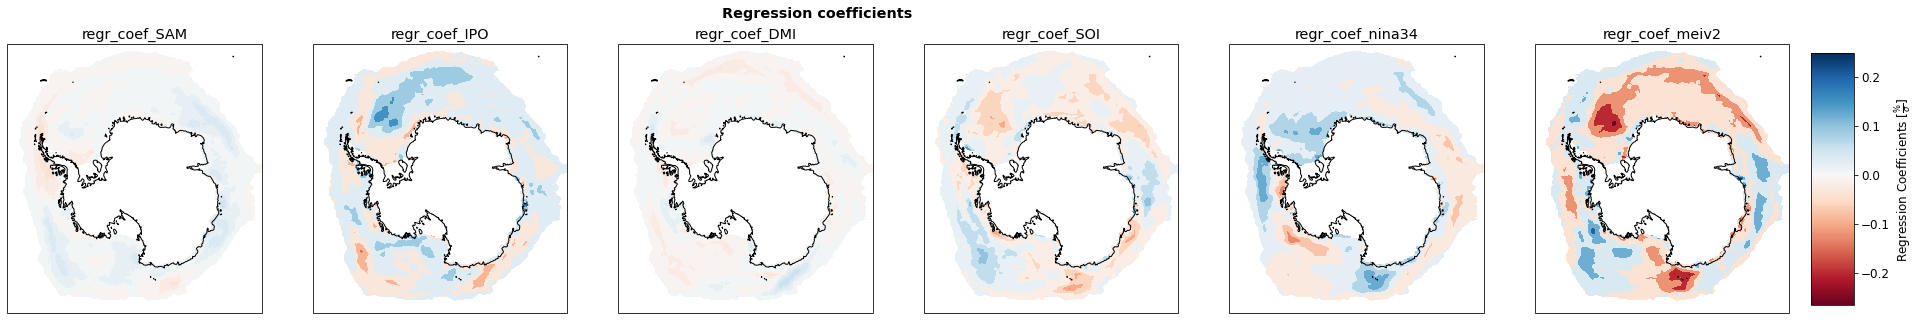

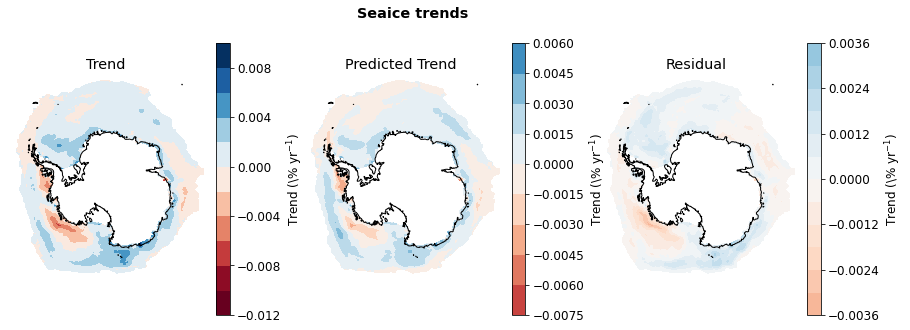

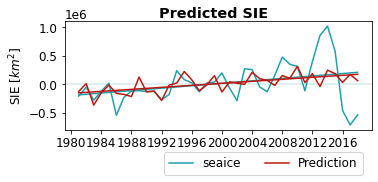

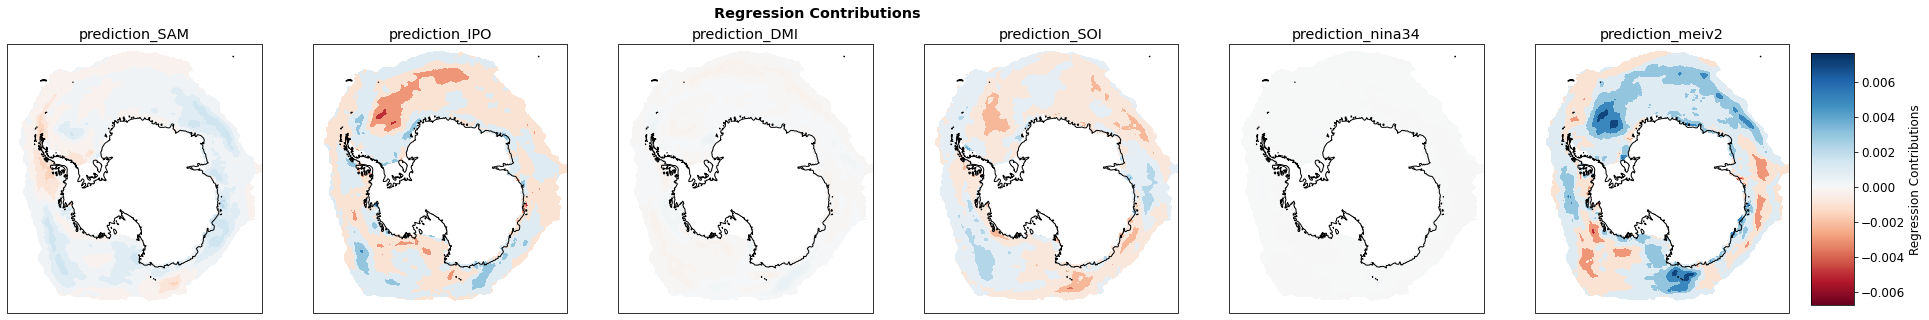

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22738.73it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22723.51it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22893.58it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22796.84it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 21586.08it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22349.05it/s]


Predicting SIC


In [8]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
regression_results, results, individual_results = w3.regress(independant              = subindicies_list[0], 
                                                               dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                               temporal_resolution    = 'annual',
                                                               temporal_decomposition = 'anomalous',
                                                               detrend                = 'raw',
                                                               do_plotting            = True,
                                                               get_stats              = True,
                                                               individual_stats       = True)

In [7]:
results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\index_stats_0.tex')
results.transpose()

spatial_correlation        0.897
temporal_correlation       0.427
Predicted_Trend         8831.691
Actual_Trend           10725.646
dtype: float64

In [8]:
individual_results = individual_results.sort_values('individual_Predicted_Trend', ascending=False)
individual_results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\index_stats_1.tex')
individual_results.transpose()

,SAM,IPO,meiv2,SOI,DMI,nina34
individual_spatial_correlation,0.566,0.527,0.525,0.459,0.337,-0.224
individual_temporal_correlation,0.285,0.164,0.179,0.139,0.023,0.054
individual_Actual_Trend,10751.356,10751.356,10751.356,10751.356,10725.646,10751.356
individual_Predicted_Trend,3965.957,1679.192,1580.017,1135.374,95.788,-2.361
spatial_correlation,0.329,0.127,0.514,-0.285,-0.035,0.712
temporal_correlation,0.242,-0.151,0.169,-0.135,-0.023,-0.053
Actual_Trend,10725.646,10725.646,10725.646,10725.646,10725.646,10725.646
Predicted_Trend,4111.319,-6866.890,17703.468,-5610.808,-609.759,104.362


In [9]:
regression_results

<xarray.Dataset>
Dimensions:            (time: 38, x: 316, y: 332)
Coordinates:
  * time               (time) datetime64[ns] 1981-01-01 ... 2018-01-01
  * y                  (y) int32 4350000 4325000 4300000 ... -3900000 -3925000
  * x                  (x) int32 -3950000 -3925000 -3900000 ... 3900000 3925000
Data variables:
    SAM                (x, y, time) float64 -0.81 0.2061 ... 0.4541 0.7999
    IPO                (x, y, time) float64 -0.06942 1.464 ... -0.6162 -0.7681
    DMI                (x, y, time) float64 -0.8629 1.123 -0.205 ... 0.746 1.131
    SOI                (x, y, time) float64 0.383 -1.609 ... 0.5753 0.4092
    nina34             (x, y, time) float64 -0.7249 1.398 ... -0.3034 0.04809
    meiv2              (x, y, time) float64 -0.2643 1.368 ... -0.742 -0.4383
    seaice             (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction         (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_SAM      (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_IPO      (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_DMI      (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_SOI      (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_nina34   (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_meiv2    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_error    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_SAM     (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_IPO     (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_DMI     (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_SOI     (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_nina34  (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_meiv2   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

Loading t2m
Loading u10
Loading v10
Loading si10
Loading sp
{'units': 'K', 'long_name': '2 metre temperature'}
{'units': 'm s**-1', 'long_name': '10 metre U wind component'}
{'units': 'm s**-1', 'long_name': '10 metre V wind component'}
{'units': 'm s**-1', 'long_name': '10 metre wind speed'}
{'units': 'Pa', 'long_name': 'Surface pressure', 'standard_name': 'surface_air_pressure'}
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:05<00:00, 19101.62it/s]


Predicting SIC


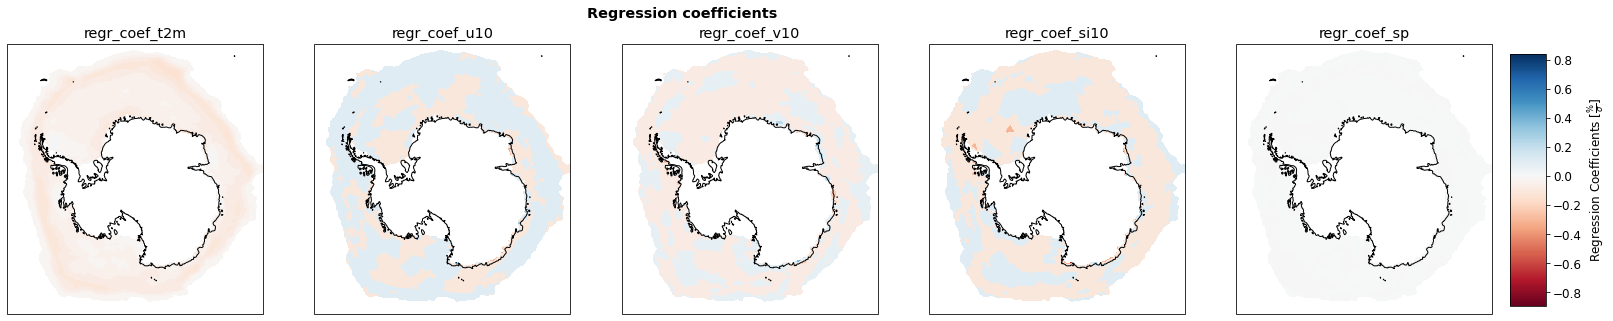

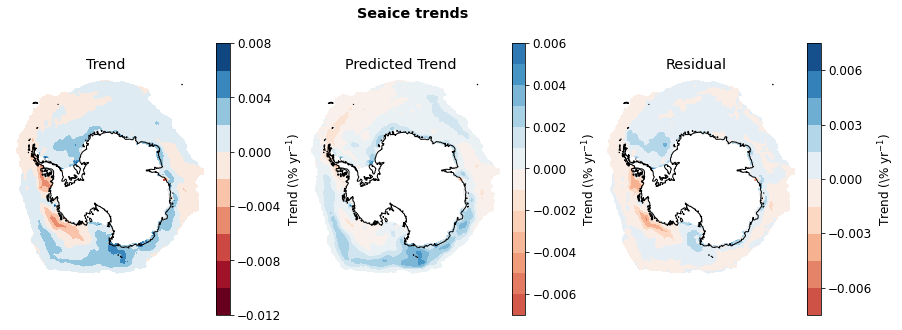

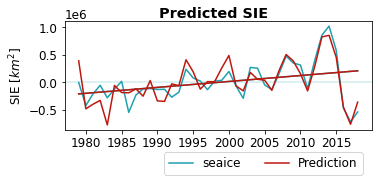

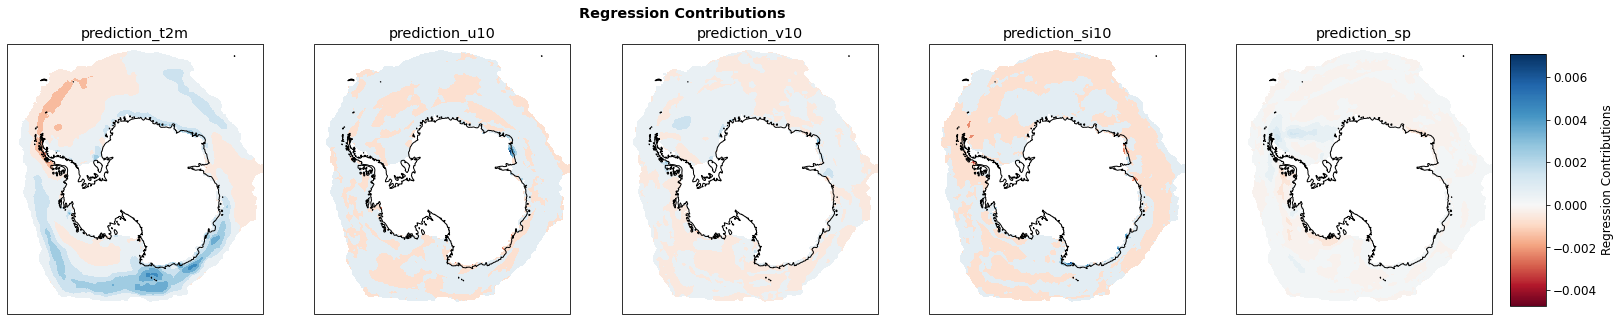

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23638.80it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23423.12it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23585.80it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23272.82it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23272.88it/s]


Predicting SIC


In [24]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
variable_regression_results, variable_results, variable_individual_results = w3.regress(independant              = ['t2m','u10', 'v10', 'si10', 'sp'], 
                                                                                        dependant                = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                                        temporal_resolution      = 'annual',
                                                                                        temporal_decomposition   = 'anomalous',
                                                                                        detrend                  = 'raw',
                                                                                        do_plotting              = True,
                                                                                        get_stats                = True,
                                                                                        individual_stats         = True)

In [ ]:
variable_regression_results

In [ ]:
variable_results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\variable_stats_0.tex')
variable_results.transpose()

In [ ]:
variable_individual_results = variable_individual_results.sort_values('individual_Predicted_Trend', ascending=False)
variable_individual_results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\variable_stats_1.tex')
variable_individual_results.transpose()

{'units': 'J m**-2', 'long_name': 'Surface net solar radiation', 'standard_name': 'surface_net_downward_shortwave_flux'}
{'units': 'J m**-2', 'long_name': 'Surface solar radiation downwards', 'standard_name': 'surface_downwelling_shortwave_flux_in_air'}
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 21824.07it/s]


Predicting SIC


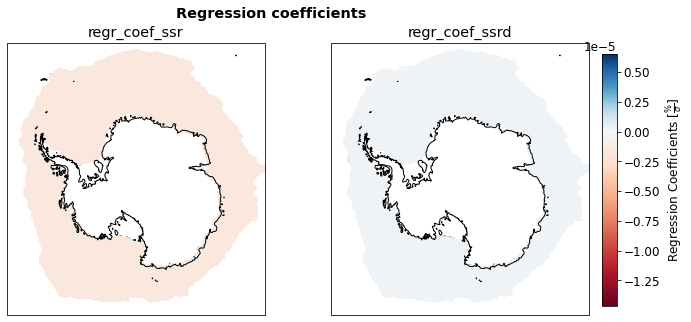

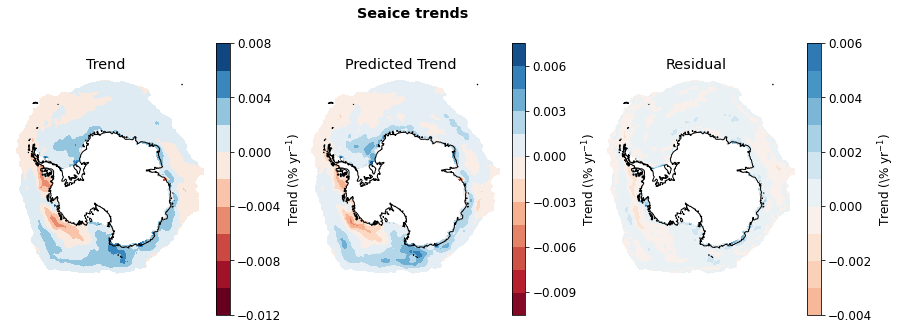

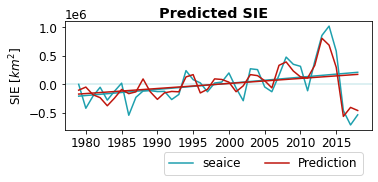

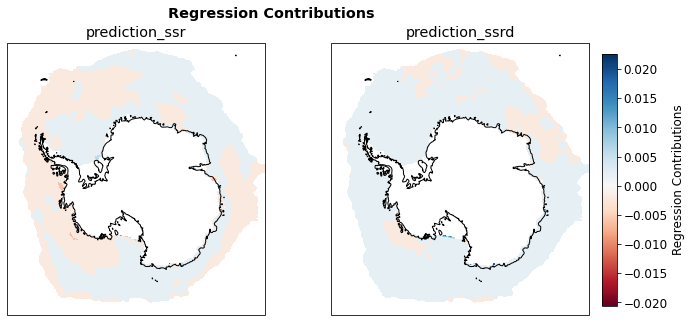

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23585.79it/s]


Predicting SIC
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 23428.05it/s]


Predicting SIC


In [11]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['ssr', 'ssrd'], 
                                                                           dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = True,
                                                                            individual_stats      = True)

In [12]:
temp_results

spatial_correlation        0.950
temporal_correlation       0.888
Predicted_Trend         8872.141
Actual_Trend           10751.356
dtype: float64

In [18]:
import xarray as xr
file = 'download.nc'
data = xr.open_dataset(file)

In [20]:
data

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 721, longitude: 1440, time: 500)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    si10       (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    sst        (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    ssr        (time, expver, latitude, longitude) float32 ...
    sp         (time, expver, latitude, longitude) float32 ...
    ssrd       (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-05 02:45:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [26]:
import numpy as np
from pyproj import Proj, transform
file = 'download.nc'
data = xr.open_dataset(file)
for variable in data:
    subdata = data[variable]
    Y, X = [10*np.arange(435000,-395000,-2500),
            10*np.arange(-395000,395000,2500)]
    x,y = np.meshgrid(X,Y)
    inProj = Proj(init='epsg:3031')
    outProj = Proj(init='epsg:4326')
    x,y = transform(inProj,outProj,x,y)
    x = x.flatten()
    y = y.flatten()
    x[x<0] = x[x<0]+360 
    x = xr.DataArray(x, dims='z')
    y = xr.DataArray(y, dims='z')
    variable_data = subdata.interp(longitude=x, latitude=y, method = 'linear', kwargs={"fill_value": 0.0})
    interpolated = subdata.values.reshape([subdata.time.size,len(Y),len(X)])
    dims_ = ['time','y','x']

    interpolated = xr.DataArray(data = interpolated, dims=dims_,coords = [data.time,Y,X])
    
    interpolated.to_netcdf(f'download/{variable}_transformed.nc')
    print(interpolated)

ValueError: cannot reshape array of size 1038240000 into shape (500,332,316)

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22519.43it/s]


Predicting SIC


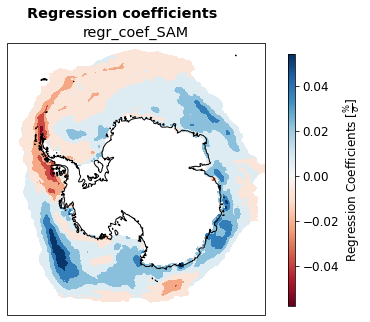

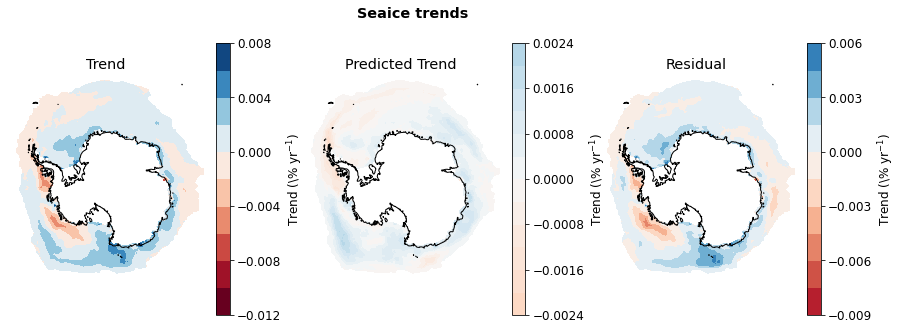

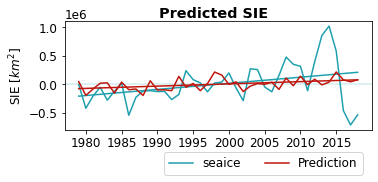

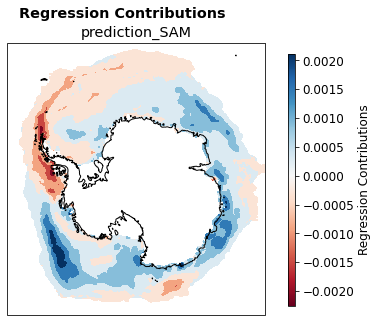

spatial_correlation        0.566
temporal_correlation       0.285
Predicted_Trend         3965.957
Actual_Trend           10751.356
dtype: float64
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22299.16it/s]


Predicting SIC


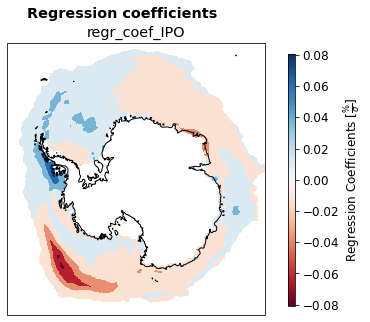

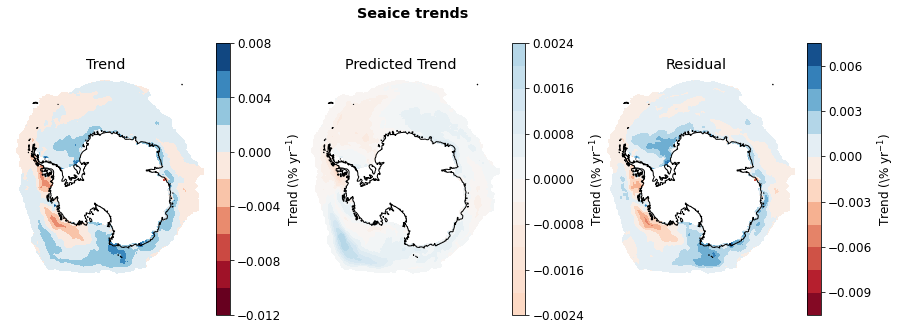

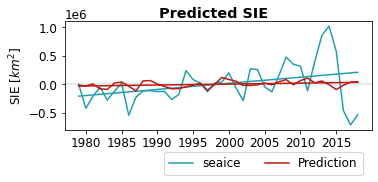

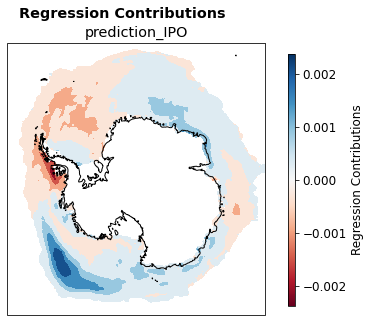

spatial_correlation        0.527
temporal_correlation       0.164
Predicted_Trend         1679.192
Actual_Trend           10751.356
dtype: float64
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22081.52it/s]


Predicting SIC


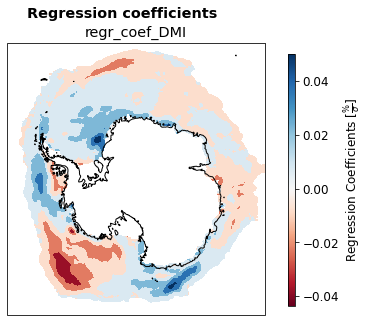

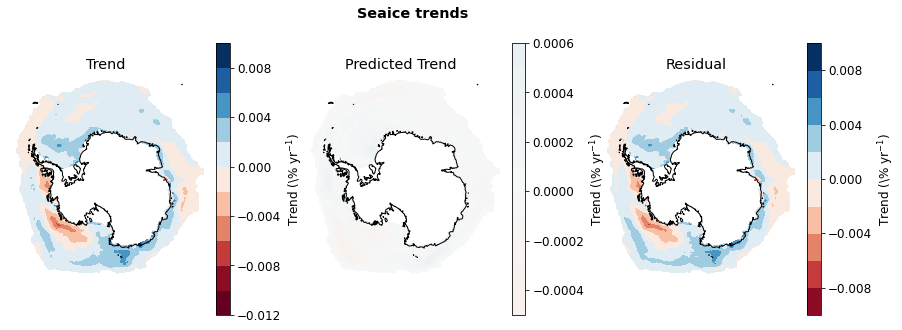

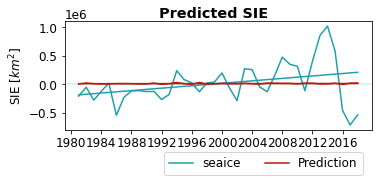

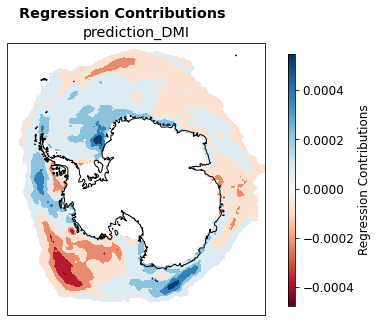

spatial_correlation        0.337
temporal_correlation       0.023
Predicted_Trend           95.788
Actual_Trend           10725.646
dtype: float64
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22291.96it/s]


Predicting SIC


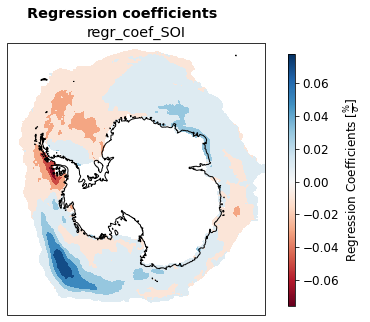

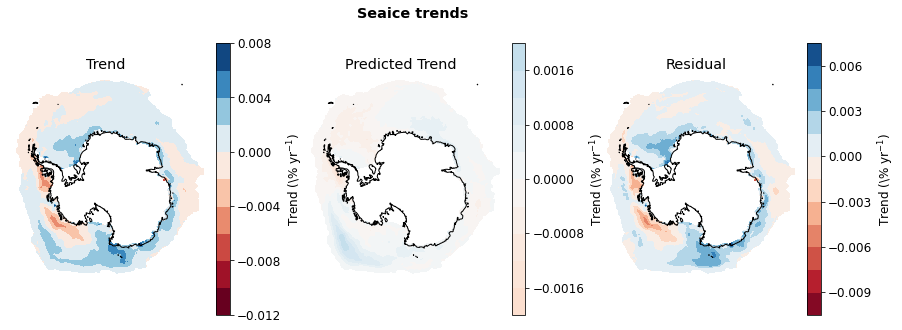

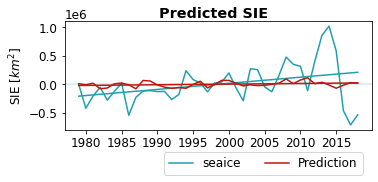

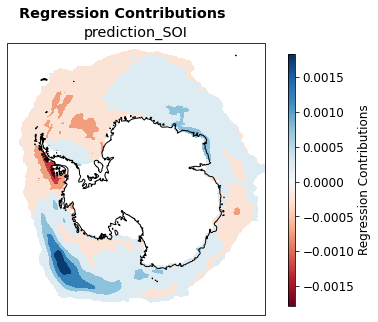

spatial_correlation        0.459
temporal_correlation       0.139
Predicted_Trend         1135.374
Actual_Trend           10751.356
dtype: float64
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22490.69it/s]


Predicting SIC


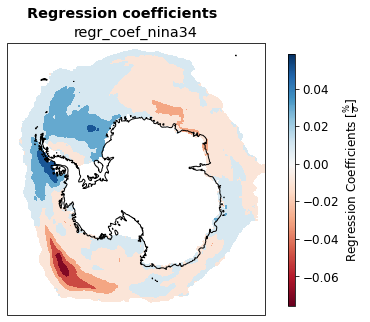

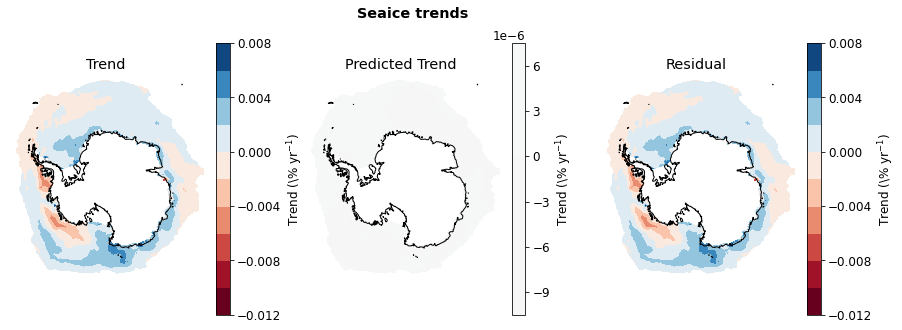

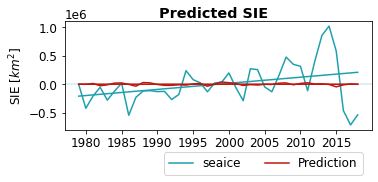

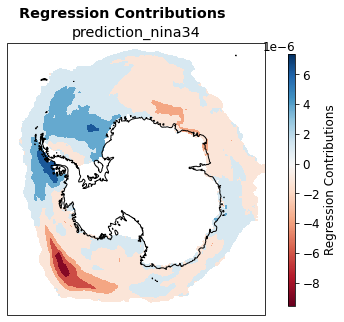

spatial_correlation       -0.224
temporal_correlation       0.054
Predicted_Trend           -2.361
Actual_Trend           10751.356
dtype: float64
Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:04<00:00, 22639.24it/s]


Predicting SIC


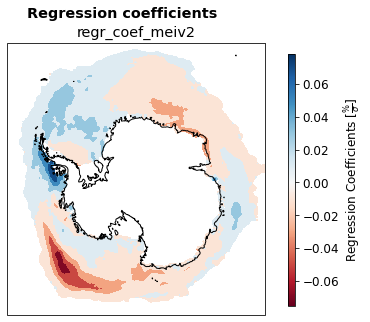

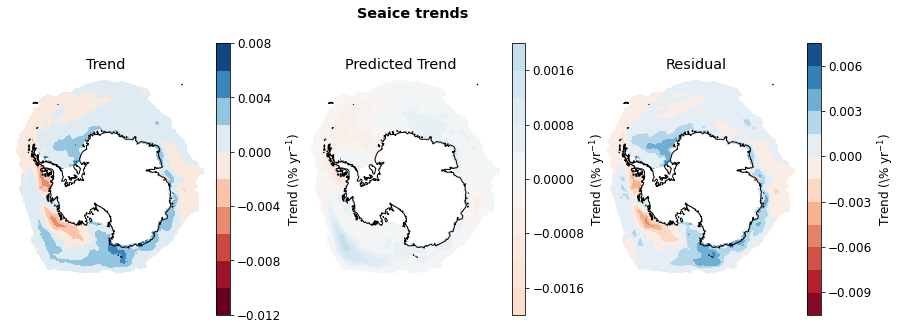

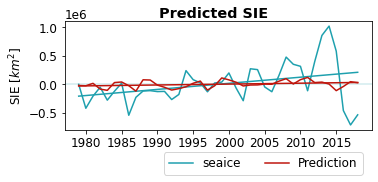

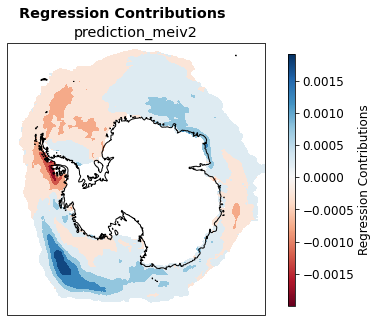

spatial_correlation        0.525
temporal_correlation       0.179
Predicted_Trend         1580.017
Actual_Trend           10751.356
dtype: float64


In [28]:
for index in subindicies_list[0]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
    regression_results, results, individual_results = w3.regress(independant              = [index], 
                                                                   dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                   temporal_resolution    = 'annual',
                                                                   temporal_decomposition = 'anomalous',
                                                                   detrend                = 'raw',
                                                                   do_plotting            = True,
                                                                   get_stats              = True,
                                                                   individual_stats       = False)
    print(results)

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:05<00:00, 18224.28it/s]


Predicting SIC


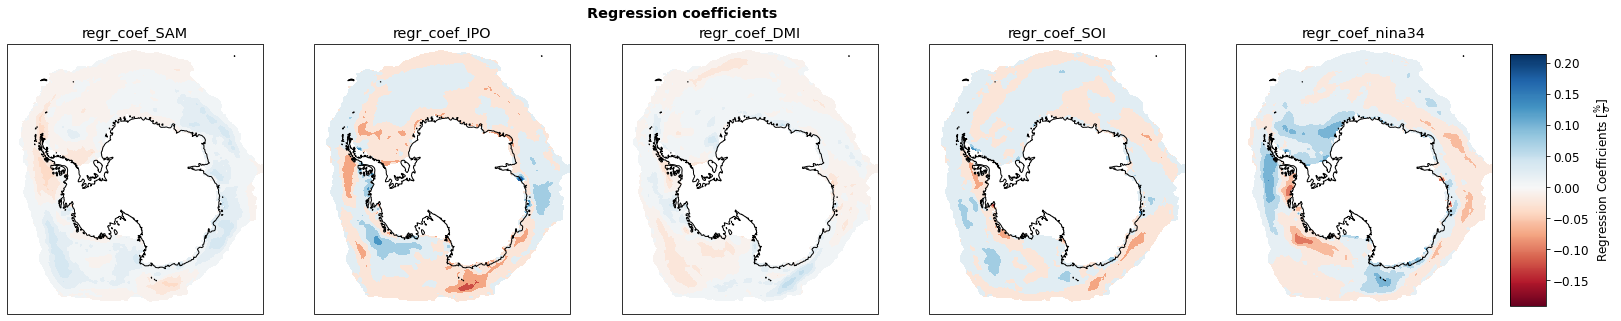

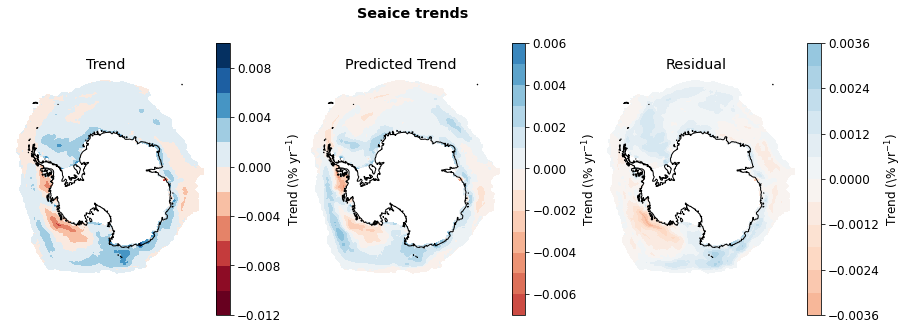

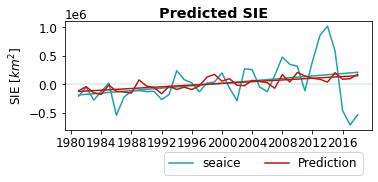

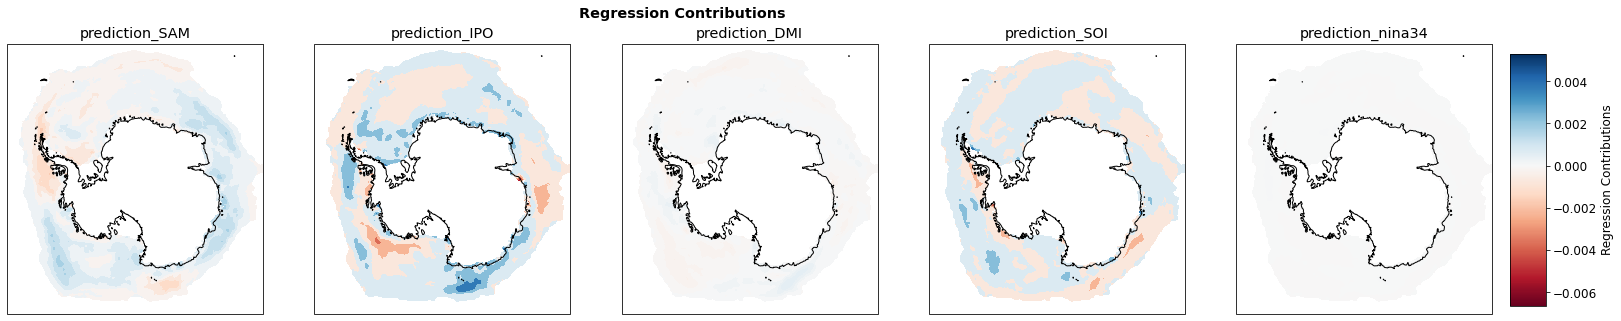

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:05<00:00, 18086.35it/s]


Predicting SIC


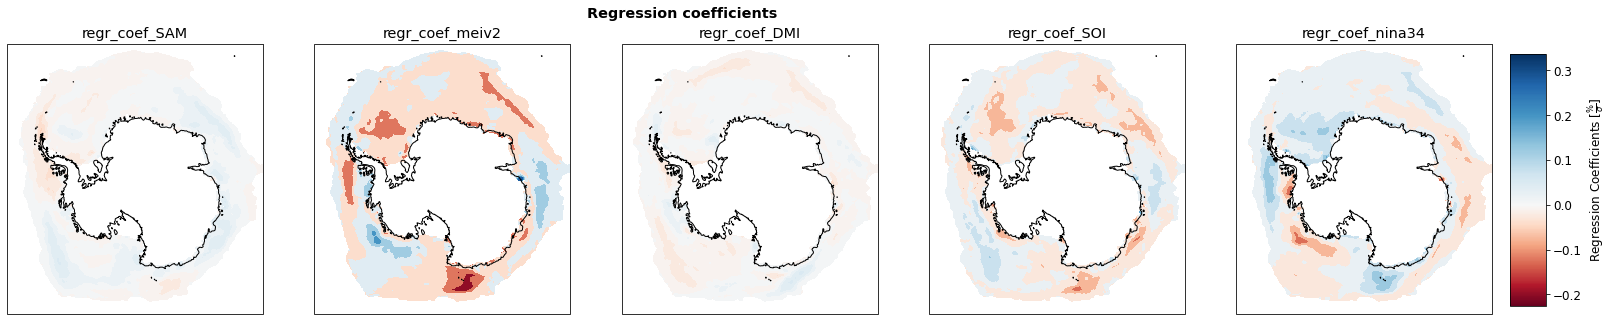

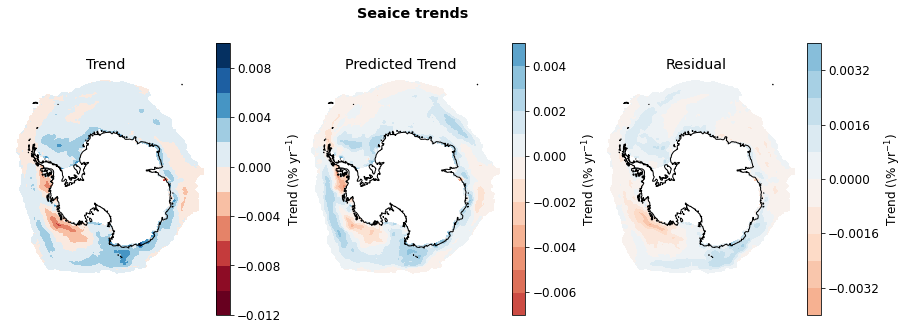

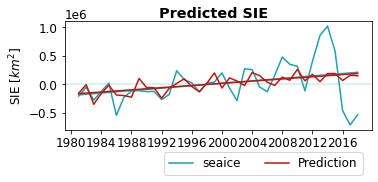

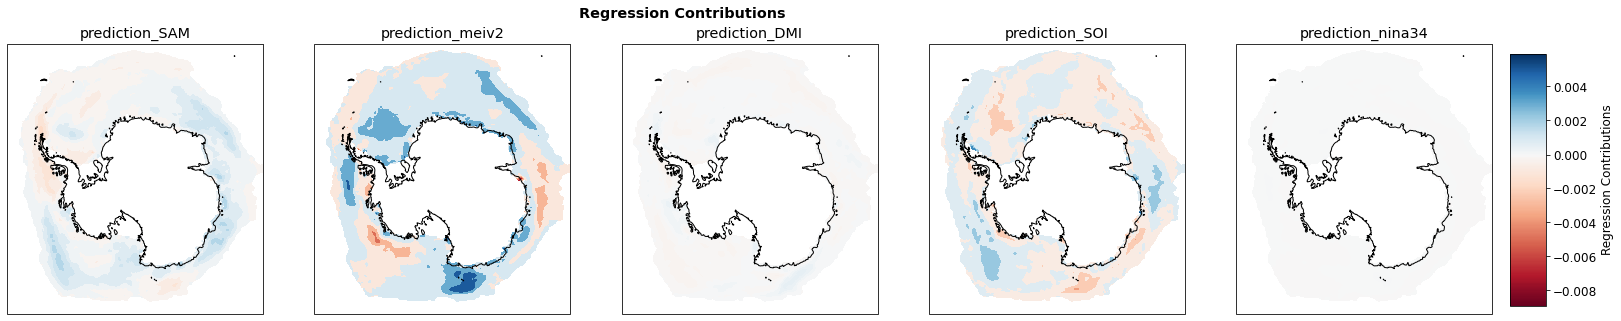

In [30]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','IPO','DMI','SOI','nina34'], 
                                                                           dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','meiv2','DMI','SOI','nina34'], 
                                                                           dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)


Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:05<00:00, 17606.17it/s]


Predicting SIC


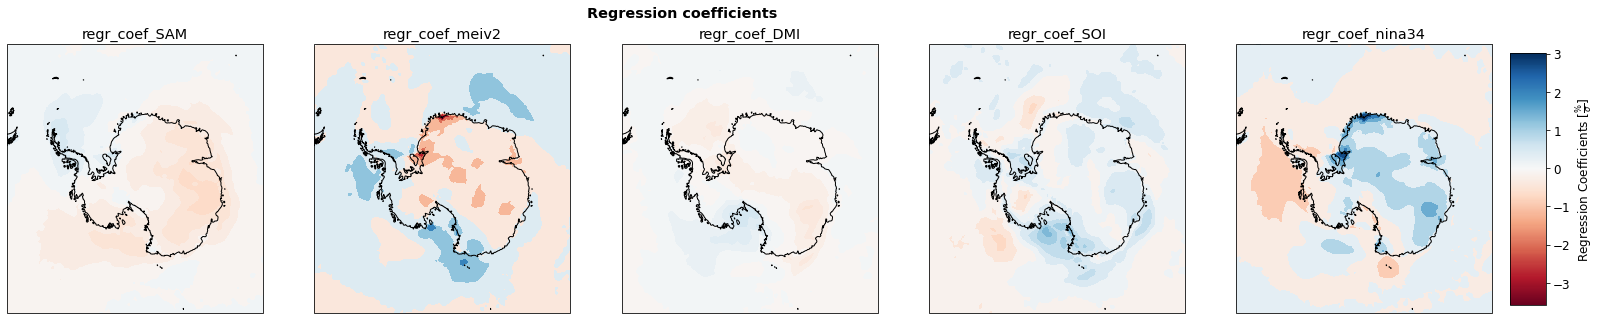

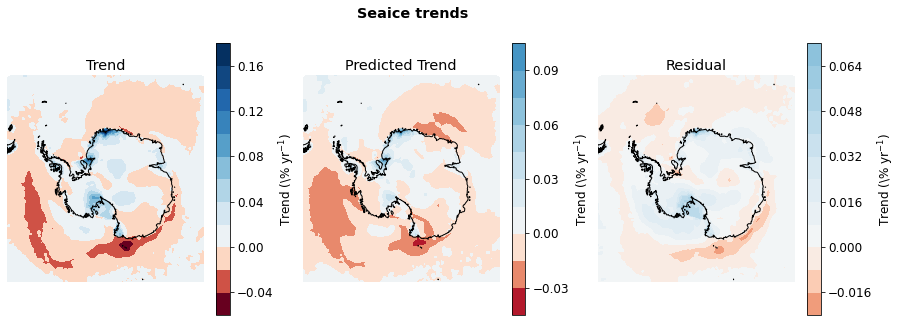

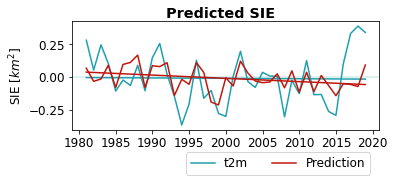

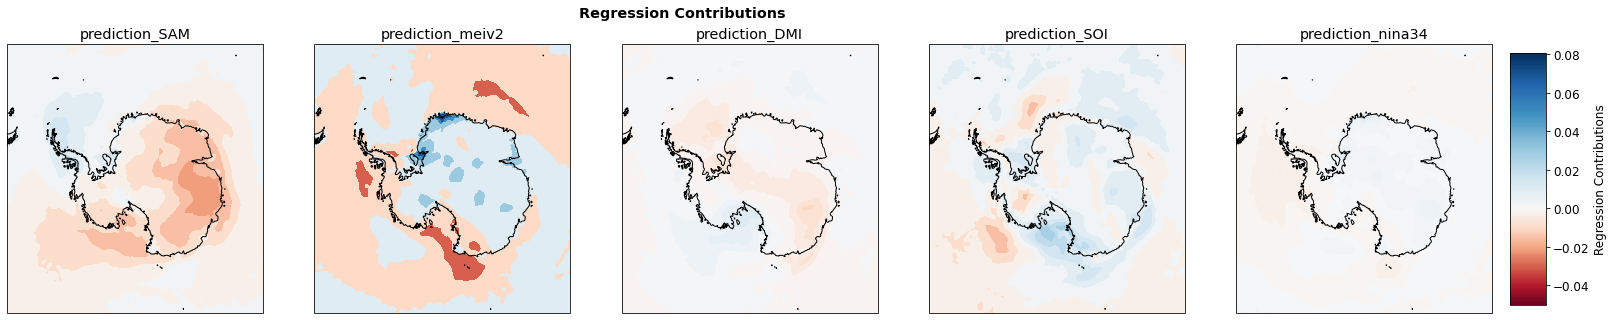

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:05<00:00, 17763.27it/s]


Predicting SIC


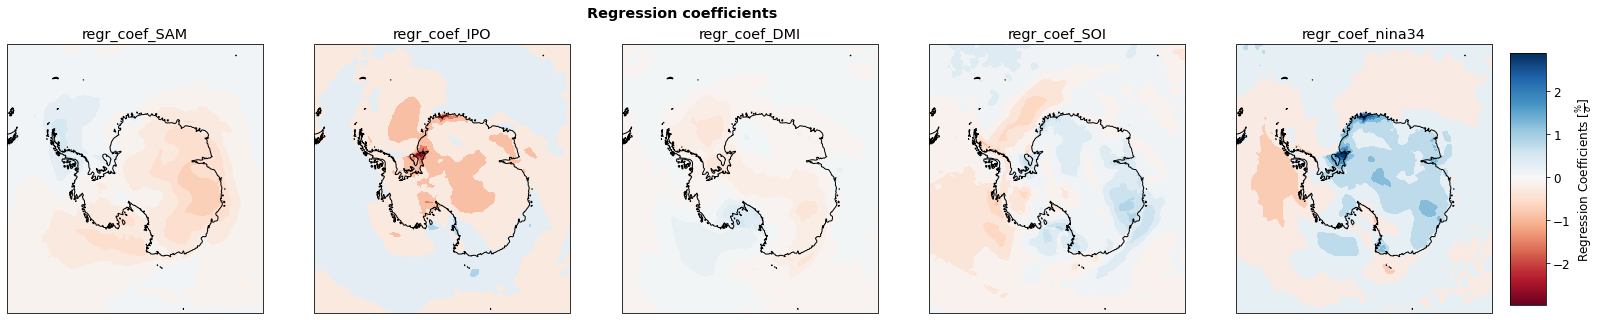

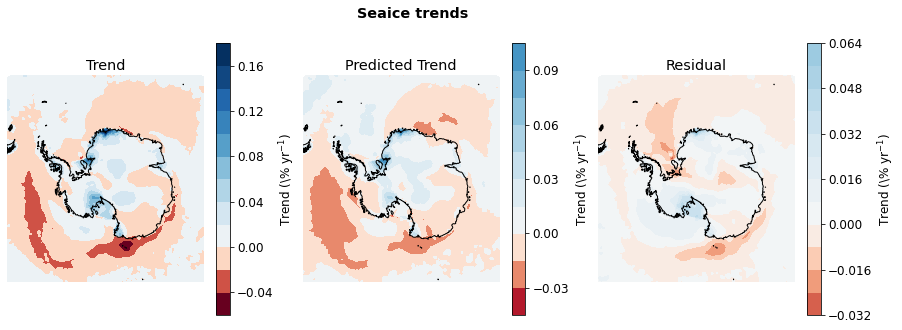

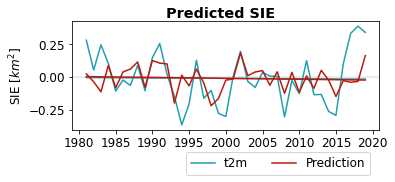

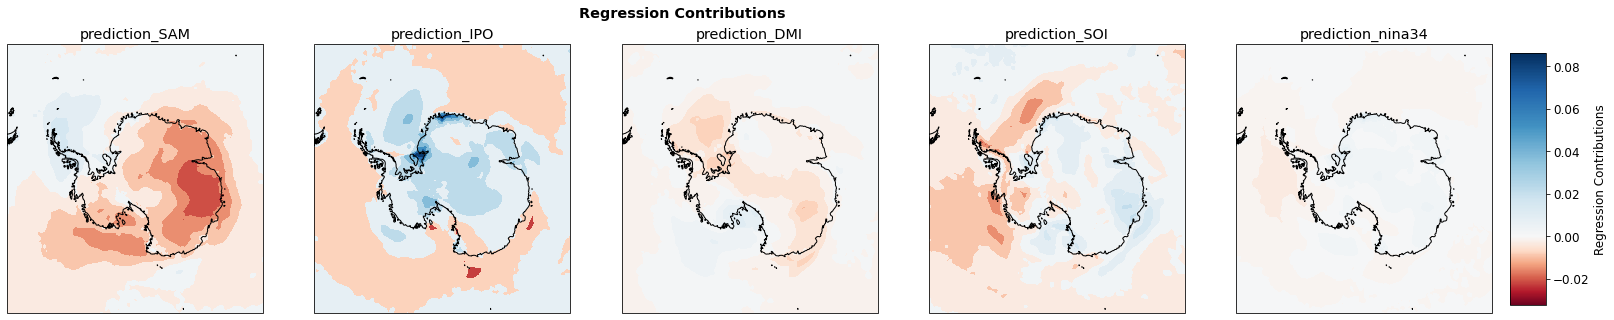

In [32]:
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','meiv2','DMI','SOI','nina34'], 
                                                                           dependant              = 't2m',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','IPO','DMI','SOI','nina34'], 
                                                                           dependant              = 't2m',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)